## Computational Physics 
### Homework 3:  Chapter 6

#### Problems 3 (a,b), 7, 8, 9, 13, 16, 17, 18


#### Exercise 6.3 (a,b): LU Decomposition


This exercise invites you to write your own
program to solve simultaneous equations using the method of LU
decomposition.


1. Starting, if you wish, with the program for Gaussian elimination in
  Example 6.1 on page 218, write a Python function that calculates the LU
  decomposition of a matrix.  The calculation is same as that for Gaussian
  elimination, except that at each step of the calculation you need to
  extract the appropriate elements of the matrix and assemble them to form
  the lower diagonal matrix $\tilde L$ of Eq. (6.32).  Test your function by
  calculating the LU decomposition of the matrix from Eq. (6.2), then
  multiplying the $\tilde{L}$ and $\tilde{U}$ you get and verifying that you
  recover the original matrix once more.
2. Build on your LU decomposition function to create a complete program
  to solve Eq. (6.2) by performing a double backsubstitution as described
  in this section.  Solve the same equations using the function
  `solve` from the numpy package and verify that you get the
  same answer either way.

LU decomposition with partial pivoting is the most widely used method for
the solution of simultaneous equations in practice.  Precisely this method
is used in the function solve from the numpy package.
There's nothing wrong with using the solve function-it's well
written, fast, and convenient.  But it does nothing you haven't already
done yourself if you've solved this exercise.

In [1]:
# 6.3 LU Decomposition

from numpy import zeros, empty, copy, array, dot

A = array([[2,1,4,1],
           [3,4,-1,-1],
           [1,-4,1,5],
           [2,-2,1,3]],float)
v = array([-4,3,9,7],float)
N = len(v)

# Function to perform LU decomp 

def LU(A):
    #print(A)
    L = zeros([N,N],float)
    U = copy(A)
    
    for m in range(N):
        #copy elements into the L matrix
        L[m:N,m] = U[m:N,m]
        
        #divide by diagonal element
        div = U[m,m]
        U[m,:] /= div
        
        # subtract from lower row
        for i in range(m+1,N):
            mult = U[i,m]
            U[i,:] -= mult*U[m,:]
    
        #print(m)
        #print(L)
        #print(U)
        
    return L,U

# Main Program
L,U = LU(A)

# Check that L*U => A
print("L*U = \n",dot(L,U),'\n = A \n',A)

# Backsubstitution number 1
y = empty(N,float)
for m in range(N):
    y[m] = v[m]
    for i in range(m):
        y[m] -= L[m,i]*y[i]
    y[m] /= L[m,m]
    
# Backsubstitution number 2
x = empty(N,float)
for m in range(N-1,-1,-1):
    x[m] = y[m]
    for i in range(m+1,N):
        x[m] -= U[m,i]*x[i]

print("x = ",x)

L*U = 
 [[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]] 
 = A 
 [[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
x =  [ 2. -1. -2.  1.]


---
#### Exercise 6.7: A Chain of Resistors

Consider a long chain of resistors
wired up like this:

<img src="resistor_chain.png" width=400>

All the resistors have the same resistance $R$.  The power rail at the top
is at voltage $V_+=5$V.  The problem is to find the voltages $V_1\ldots
V_N$ at the internal points in the circuit.

1. Using Ohm's law and the Kirchhoff current law, which says that the
  total net current flow out of (or into) any junction in a circuit must be
  zero, show that the voltages $V_1\ldots V_N$ satisfy the equations
 \begin{align*}
3V_1 - V_2 - V_3 &= V_+, \\
-V_1 + 4V_2 - V_3 - V_4 &= V_+, \\
                        &\hspace{0.6em}\vdots \\
-V_{i-2} - V_{i-1} + 4V_i - V_{i+1} - V_{i+2} &= 0, \\
                        &\hspace{0.6em}\vdots \\
-V_{N-3} - V_{N-2} + 4V_{N-1} - V_N &= 0, \\
-V_{N-2} - V_{N-1} + 3V_N &= 0.
\end{align*}
Express these equations in vector form $\tilde{A}\vec{v} = \vec{w}$ and find
the values of the matrix $\tilde{A}$ and the vector $\vec{w}$.
2. Write a program to solve for the values of the~$V_i$ when there are
  $N=6$ internal junctions with unknown voltages.  (Hint: All the values of
  $V_i$ should lie between zero and $5$V.  If they don't, something is
  wrong.)
3. Now repeat your calculation for the case where there are $N=10\,000$
  internal junctions.  This part is not possible using standard tools like
  the `solve` function.  You need to make use of the fact that the
  matrix $\vec{A}$ is banded and use the `banded` function from the
  file `banded.py`, discussed in Appendix E.

**Solution**

At the first internal junction Kirchoff's law for the net current flow says that 
$$
\frac{V_1-V_+}{R} + \frac{V_1-V_2}{R} + \frac{V_1-V_3}{R} = 0.
$$
Multiplying by $R$ and rearranging gives the first equation above.

For the second junction
$$
\frac{V_2-V_+}{R} + \frac{V_2-V_1}{R} + \frac{V_2-V_3}{R} + \frac{V_2-V_4}{R} = 0.
$$
Multiplying by $R$ and rearranging gives the second equation.

In general the $i$th junction connects to $i-2$, $i-1$, $i+1$ and $i+2$ junctions.  This equation is given by the middle equation in the array above, and so on for the final 2 equations.

In matrix form:

$$\begin{pmatrix}
3 & -1 & -1 \\
-1 & 4 & -1 & -1\\
-1 & -1 & 4 & -1 & -1\\
    & -1 & -1 & 4 & -1 & -1\\
    & & \ddots & \ddots& \ddots& \ddots& \ddots& 
    \end{pmatrix}
    \begin{pmatrix}
        V_1 \\
        V_2 \\    
        V_3 \\    
        V_4 \\
        \vdots
        \end{pmatrix}
        =
            \begin{pmatrix}
        V_+ \\
        V_+ \\    
        0 \\    
        0 \\
        \vdots
        \end{pmatrix}
    $$
   
Here is an example for the $N=6$ case


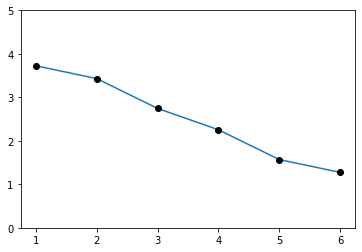

In [2]:
%matplotlib inline

# Use banded.py, which saves space by storing just the band of the array - not all zero elements

# Banded matrix solution

from numpy import empty, zeros
from banded import banded
from pylab import plot, show, ylim

# Constants
N = 6
Vp = 5.0

# Set up initial values 
A = zeros([5,N])
A[0,:] = -1
A[1,:] = -1
A[2,:] = 4.0
A[3,:] = -1
A[4,:] = -1
A[2,0] = A[2,N-1] = 3

v = zeros(N)
v[0] = v[1] = Vp

# solve
w = banded(A,v,2,2)

# Plot
plot(range(1,N+1),w)
plot(range(1,N+1),w,'ko')
ylim(0,5)
show()

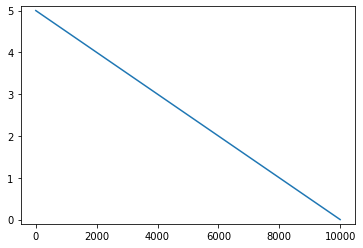

In [3]:
# Banded matrix solution
# N = 10,000

from numpy import empty, zeros
from banded import banded
from pylab import plot, show, ylim

# Constants
N = 10000
Vp = 5.0

# Set up initial values 
A = zeros([5,N])
A[0,:] = -1
A[1,:] = -1
A[2,:] = 4.0
A[3,:] = -1
A[4,:] = -1
A[2,0] = A[2,N-1] = 3

v = zeros(N)
v[0] = v[1] = Vp

# solve
w = banded(A,v,2,2)

# Plot
plot(range(1,N+1),w)
ylim(-0.1,5.1)
show()

---
#### Exercise 6.8: The QR Algorithm

In this exercise you'll write a
program to calculate the eigenvalues and eigenvectors of a real symmetric
matrix using the QR algorithm.  The first challenge is to write a program
that finds the QR decomposition of a matrix.  Then we'll use that
decomposition to find the eigenvalues.

As described above, the QR decomposition expresses a real square
matrix $\tilde{A}$ in the form $\tilde{A}=\tilde{Q}\tilde{R}$, where $\tilde{Q}$ is
an orthogonal matrix and $\tilde{R}$ is an upper-triangular matrix.  Given an
$N\times N$ matrix $\tilde{A}$ we can compute the QR decomposition as
follows.

Let us think of the matrix as a set of $N$ column
vectors $\vec{a}_0\ldots\vec{a}_{N-1}$ thus:
$$
\tilde{A} = \begin{pmatrix}
            | & | & | & \cdots \\
            \vec{a}_0 & \vec{a}_1 & \vec{a}_2 & \cdots \\
            | & | & | & \cdots
          \end{pmatrix},
$$
where we have numbered the vectors in Python fashion, starting from zero,
which will be convenient when writing the program.  We now define two new
sets of vectors $\vec{u}_0\ldots\vec{u}_{N-1}$ and
$\vec{q}_0\ldots\vec{q}_{N-1}$ as follows:
\begin{align*}
\vec{u}_0 &= \vec{a}_0,
  & \vec{q}_0 = {\vec{u}_0\over|\vec{u}_0|}\,,\qquad \\
\vec{u}_1 &= \vec{a}_1 - (\vec{q}_0\cdot\vec{a}_1) \vec{q}_0,
  & \vec{q}_1 = {\vec{u}_1\over|\vec{u}_1|}\,, \qquad \\
\vec{u}_2 &= \vec{a}_2 - (\vec{q}_0\cdot\vec{a}_2) \vec{q}_0
             - (\vec{q}_1\cdot\vec{a}_2) \vec{q}_1,
  & \vec{q}_2 = {\vec{u}_2\over|\vec{u}_2|}\,, \qquad
\end{align*}
and so forth.  The general formulas for calculating $\vec{u}_i$ and
$\vec{q}_i$ are
$$
\vec{u}_i = \vec{a}_i - \sum_{j=0}^{i-1} (\vec{q}_j\cdot\vec{a}_i)
            \vec{q}_j, \qquad
\vec{q}_i = {\vec{u}_i\over|\vec{u}_i|}.
$$


1. Show, by induction or otherwise, that the vectors $\vec{q}_i$ are
  orthonormal, i.e., that they satisfy
$$
\vec{q}_i\cdot\vec{q}_j = \biggl\lbrace\begin{array}{ll}
                            1 & \quad\mbox{if $i=j$,} \\
                            0 & \quad\mbox{if $i\ne j$.}
                          \end{array}
$$

Now, rearranging the definitions of the vectors, we have
\begin{align*}
\vec{a}_0 &= |\vec{u}_0|\,\vec{q}_0, \\
\vec{a}_1 &= |\vec{u}_1|\,\vec{q}_1 + (\vec{q}_0\cdot\vec{a}_1) \vec{q}_0, \\
\vec{a}_2 &= |\vec{u}_2|\,\vec{q}_2 + (\vec{q}_0\cdot\vec{a}_2) \vec{q}_0
              + (\vec{q}_1\cdot\vec{a}_2) \vec{q}_1,
\end{align*}
and so on.  Or we can group the vectors $\vec{q}_i$ together as the
columns of a matrix and write all of these equations as a single matrix
equation
$$
\tilde{A} = \begin{pmatrix}
            | & | & | & \cdots \\
            \vec{a}_0 & \vec{a}_1 & \vec{a}_2 & \cdots \\
            | & | & | & \cdots
          \end{pmatrix}
 =
\begin{pmatrix}
  | & | & | & \cdots \\
  \vec{q}_0 & \vec{q}_1 & \vec{q}_2 & \cdots \\
  | & | & | & \cdots
\end{pmatrix}
\begin{pmatrix}
|\vec{u}_0| & \vec{q}_0\cdot\vec{a}_1 & \vec{q}_0\cdot\vec{a}_2 & \cdots \\
0           & |\vec{u}_1| & \vec{q}_1\cdot\vec{a}_2 & \cdots \\
0           & 0           & |\vec{u}_2| & \cdots
\end{pmatrix}.
$$
(If this looks complicated it's worth multiplying out the matrices on the
right to verify for yourself that you get the correct expressions for
the $\vec{a}_i$.)

Notice now that the first matrix on the right-hand side of this equation,
the matrix with columns $\vec{q}_i$, is orthogonal, because the
vectors $\vec{q}_i$ are orthonormal, and the second matrix is upper
triangular.  In other words, we have found the QR decomposition
$\tilde{A}=\tilde{Q}\tilde{R}$.  The matrices $\tilde{Q}$ and $\tilde{R}$ are
$$
\tilde{Q} =
\begin{pmatrix}
  | & | & | & \cdots \\
  \vec{q}_0 & \vec{q}_1 & \vec{q}_2 & \cdots \\
  | & | & | & \cdots
\end{pmatrix}
,\qquad
\tilde{R} =
\begin{pmatrix}
|\vec{u}_0| & \vec{q}_0\cdot\vec{a}_1 & \vec{q}_0\cdot\vec{a}_2 & \cdots \\
0           & |\vec{u}_1| & \vec{q}_1\cdot\vec{a}_2 & \cdots \\
0           & 0           & |\vec{u}_2| & \cdots
\end{pmatrix}.
$$

2. Write a Python function that takes as its argument a real square
  matrix $\tilde{A}$ and returns the two matrices $\tilde{Q}$ and $\tilde{R}$
  that form its QR decomposition.  As a test case, try out your function on
  the matrix
$$
\tilde{A} = \begin{pmatrix}
            1 & 4 & 8 & 4 \\
            4 & 2 & 3 & 7 \\
            8 & 3 & 6 & 9 \\
            4 & 7 & 9 & 2
          \end{pmatrix}.
$$
Check the results by multiplying $\tilde{Q}$ and $\tilde{R}$ together to
recover the original matrix $\tilde{A}$ again.
3. Using your function, write a complete program to calculate the
  eigenvalues and eigenvectors of a real symmetric matrix using the QR
  algorithm.  Continue the calculation until the magnitude of every
  off-diagonal element of the matrix is smaller than $10^{-6}$.  Test your
  program on the example matrix above.  You should find that the
  eigenvalues are $1$, $21$, $-3$, and $-8$.


**Solution to part 1**

Suppose that for some value of $i$ the vectors $\vec q_k$ are orthonormal for all $0\le k\lt i$.  Then vector $\vec q_i$ is orthogonal to all $\vec q_k$ with $k<i$, because
\begin{align*}
\vec q_i\cdot\vec q_k =& \frac{\vec u_i}{|\vec u_i|} = \frac{1}{|\vec u_i|}\left[{\vec a_i - \sum_{j=0}^{i-1}(\vec q_j\cdot \vec a_i)\vec q_j}\right]\cdot \vec q_k\\
=& \frac{1}{|\vec u_i|}\left[{\vec a_i\cdot \vec q_k - \sum_{j=0}^{i-1}(\vec q_j\cdot \vec a_i)(\vec q_j\cdot \vec q_k)}\right].
\end{align*}
All terms in the sum over $j$ are zero because the $\vec q$ are orthonormal and hence $\vec q_j\cdot\vec q_k = \delta_{jk}$. So for the term $j = k$
$$\vec q_i\cdot \vec q_k = \frac{1}{|\vec u_i|}[\vec a_i\cdot \vec q_k - \vec q_k\cdot \vec a_i] = 0$$.
The vector $\vec q_i$ is also normalized to unity $|\vec q_i|$ = 1.  

Thus, if the first $i-1$ vectors are orthonormal, so are the first $i$ vectors.  noting that $|\vec q_0|=1$, we can now apply induction with $\vec q_0$ as the base case to prove that all the vectors $\vec q_i$ are orthonormal.

In [4]:
# QR Algorithm - Ex 6.8

from math import sqrt
from numpy import array,empty,zeros,dot,copy
from numpy import identity, absolute, max

A = array([[1,4,8,4],
           [4,2,3,7],
           [8,3,6,9],
           [4,7,9,2]],float)

N = len(A)
epsilon = 1.e-6

# Magnitude of a vector
def mag(v):
    return sqrt(dot(v,v))

# Function to calculate QR decomposition
def QR(A):
    U = empty([N,N],float)
    Q = zeros([N,N],float)  
    R = zeros([N,N],float)
    
    for m in range(N):
        U[:,m] = A[:,m]
        for i in range(m):
            R[i,m] = dot(Q[:,i],A[:,m])
            U[:,m] -= R[i,m]*Q[:,i]
        R[m,m] = mag(U[:,m])
        Q[:,m] = U[:,m]/R[m,m]
    return Q,R

# Main Program
V = identity(N)

delta = 1.0
while delta > epsilon:
    # Perform a step of the QR algorithm
    Q, R = QR(A)
    A = dot(R,Q)
    V = dot(V,Q)
    
    # find the largest off-diagonal element
    Ac = copy(A)
    for i in range(N):
        Ac[i,i] = 0.0
    delta = max(absolute(Ac))
    
print(A)
print(V)

[[ 2.10000000e+01  7.36067996e-07  3.58098914e-14 -4.71410140e-14]
 [ 7.36067998e-07 -8.00000000e+00  5.99038895e-08 -9.78974979e-15]
 [ 1.76373367e-14  5.99038974e-08 -3.00000000e+00 -2.06493959e-08]
 [ 5.69063112e-23  9.58659066e-16 -2.06493983e-08  1.00000000e+00]]
[[ 0.43151698 -0.38357064 -0.77459666 -0.25819889]
 [ 0.38357063  0.43151698 -0.2581989   0.77459667]
 [ 0.62330228  0.52740965  0.25819889 -0.51639778]
 [ 0.52740965 -0.62330227  0.51639779  0.25819889]]


---
#### Exercise 6.9: Asymmetric Quantum Well


Quantum mechanics can be formulated as a matrix problem and solved
on a computer using linear algebra methods.  Suppose, for example, we have
a particle of mass~$M$ in a one-dimensional quantum well of width $L$, but
not a square well like the examples you've probably seen before.  Suppose
instead that the potential $V(x)$ varies somehow inside the well: 

We cannot solve such problems analytically in general, but we can solve
them on the computer.

In a pure state of energy $E$, the spatial part of the wavefunction
obeys the time-independent Schr\"odinger equation $\hat{H}\psi(x) =
E\psi(x)$, where the Hamiltonian operator $\hat{H}$ is given by
$$
\hat{H} = - {\hbar^2\over2M}\,{d^2\over d x^2} + V(x).
$$
For simplicity, let's assume that the walls of the well are infinitely
high, so that the wavefunction is zero outside the well, which means it
must \emph{go to} zero at $x=0$ and $x=L$.  In that case, the wavefunction
can be expressed as a Fourier sine series thus:
$$
\psi(x) = \sum_{n=1}^\infty \psi_n \sin {\pi n x\over L},
$$
where $\psi_1,\psi_2,\ldots$ are the Fourier coefficients.

1. Noting that, for $m,n$ positive integers
$$
\int_0^L \sin {\pi m x\over L} \,\sin{\pi n x\over L} \>d x
  = \begin{cases}
      L/2 & \qquad\mbox{if $m=n$,} \\
      0          & \qquad\mbox{otherwise,}
    \end{cases}
$$
show that the Schr\"odinger equation $\hat{H}\psi = E\psi$ implies that
$$
\sum_{n=1}^\infty \psi_n \int_0^L \sin{\pi m x\over L}
                  \hat{H}\sin{\pi n x\over L} \>d x
  = \frac{1}{2} L E \psi_m.
$$
Hence, defining a matrix~$\tilde{H}$ with elements
\begin{align*}
H_{mn} &= {2\over L} \int_0^L \sin{\pi m x\over L}
          \hat{H}\sin{\pi n x\over L} \>d x \nonumber\\
       &= {2\over L} \int_0^L \sin{\pi m x\over L}
          \biggl[ - {\hbar^2\over2M}\,{d^2\over d x^2} + V(x) \biggr]
          \sin{\pi n x\over L} \>d x,
\end{align*}
show that Schr\"odinger's equation can be written in matrix form as
$\tilde{H}\boldsymbol{\psi} = E\boldsymbol{\psi}$, where $\boldsymbol{\psi}$
is the vector $(\psi_1,\psi_2,\ldots)$.  Thus $\boldsymbol{\psi}$ is an
eigenvector of the \defn{Hamiltonian matrix} $\tilde{H}$ with eigenvalue $E$.
If we can calculate the eigenvalues of this matrix, then we know the
allowed energies of the particle in the well.

2. For the case $V(x)=ax/L$, evaluate the integral in $H_{mn}$
  analytically and so find a general expression for the matrix
  element $H_{mn}$.  Show that the matrix is real and symmetric.  You'll
  probably find it useful to know that
$$
\hspace{-2em}
\int_0^L x \sin{\pi m x\over L} \sin{\pi n x\over L} \>d x
  = \begin{cases}
      0 & \quad\mbox{if $m\ne n$ and both even or both odd,} \\
      {\displaystyle-\biggl({2L\over\pi}\biggr)^2{mn\over(m^2-n^2)^2}}
        & \quad\mbox{if $m\ne n$ and one is even, one is odd,} \\
      L^2/4 & \quad\mbox{if $m=n$.}
    \end{cases}
$$
Write a Python program to evaluate your expression for $H_{mn}$ for
arbitrary $m$ and $n$ when the particle in the well is an electron, the
well has width $5\,$\AA, and $a=10\,$eV.  (The mass and charge of an
electron are $9.1094\times10^{-31}\,$kg and $1.6022\times10^{-19}\,$C
respectively.)
3. The matrix $\tilde{H}$ is in theory infinitely large, so we cannot
  calculate all its eigenvalues.  But we can get a pretty accurate solution
  for the first few of them by cutting off the matrix after the first few
  elements.  Modify the program you wrote for part (b) above to create a
  $10\times10$ array of the elements of $\tilde{H}$ up to $m,n=10$.
  Calculate the eigenvalues of this matrix using the appropriate function
  from `numpy.linalg` and hence print out, in units of electron volts,
  the first ten energy levels of the quantum well, within this
  approximation.  You should find, for example, that the ground-state
  energy of the system is around $5.84\,$eV.  (Hint: Bear in mind that
  matrix indices in Python start at zero, while the indices in standard
  algebraic expressions, like those above, start at one.  You will need to
  make allowances for this in your program.)
\item Modify your program to use a $100\times100$ array instead and again
  calculate the first ten energy eigenvalues.  Comparing with the values
  you calculated in part (c), what do you conclude about the accuracy of
  the calculation?
\item Now modify your program once more to calculate the
  wavefunction $\psi(x)$ for the ground state and the first two excited
  states of the well.  Use your results to make a graph with three curves
  showing the probability density $|\psi(x)|^2$ as a function of $x$ in
  each of these three states.  Pay special attention to the normalization
  of the wavefunction-it should satisfy the condition $\int_0^L
  |\psi(x)|^2 \>d x=1$.  Is this true of your wavefunction?


**Solution to part 1**

Substituting $\psi(x) = \sum_n \psi_n \sin n\pi x / L$ into $\hat H\psi = E\psi$, multiplying by $\sin m\pi x/L$, and integrating over $x$ gives

\begin{align*}
\sum_{n=1}^\infty\psi_n\int_0^1&\sin\frac{m\pi x}{L}\hat H \sin\frac{n\pi x}{L}\,dx\\
=& E \sum_{n=1}^\infty\int_0^1\sin\frac{m\pi x}{L} \sin\frac{n\pi x}{L}\,dx\\
=& \frac{1}{2} LE\sum_{n=1}^\infty\delta_{nm} \\
=& \frac{1}{2} LE\psi_m.
\end{align*}
With the given matrix definition this can be written also as 
$$
\frac{1}{2}L\sum_n H_{mn}\psi_n = \frac{1}{2} LE\psi_m,
$$
or equivalently 
$$
\sum_{n=1}^\infty H_mn\psi_n = E\psi_m.
$$
In matrix notation this reads ${\mathbf H}\psi = E\psi$, where $\mathbf H$ is the matrix with elements $H_{mn}$.

**Solution to part 2**

Writing out the integral it splits into two terms, which can be evaluated using the two integrals given.  The resulting expression for the matrix elements is

$$
H_{mn} = \begin{cases}
0 & \text{if $m\ne n$ and both even/odd,}\\
-\frac{8amn}{\pi^2(m^2-n^2)^2} & \text{if $m\ne n$, one even, one odd}\\
\frac{1}{2}a + \frac{\pi^2 \hbar^2m^2}{2ML^2} & \text{if $m=n$}.
\end{cases}
$$
The matrix is clearly real - no complex number here - and it is symmetric because if we interchange $m$ and $n$ we get the same expression.

In [5]:
# Here's a program to calculate the energies

from math import pi, sin, sqrt
from numpy import empty, linspace
from numpy.linalg import eigvalsh

hbar = 1.0546e-34
q = 1.6022e-19
M = 9.1094e-31
L = 5.e-10
a = 10*q
N = 10
to_print = 10

# Function to return an element of the matrix H 
def H(m,n):
    if m==n:
        return pi*pi*m*m*hbar*hbar/(2*L*L*M) + 0.5*a
    if (m+n)%2==0:
        return 0.0
    return -8*a*m*n/(pi*pi*((m*m-n*n)**2))

# Construct the matrix. Note m and n are one less in these
# expressions than in the original formulae because Python
# numbering starts at zero, not one
Hmat = empty([N,N])
for m in range(N):
    for n in range(N):
        Hmat[m,n] = H(m+1,n+1)

# Calculate the values and vectors
value = eigvalsh(Hmat)
        
# Print the results
for n in range(to_print):
    print(f"E{n+1} = {value[n]/q:.3f} eV")

E1 = 5.836 eV
E2 = 11.181 eV
E3 = 18.663 eV
E4 = 29.145 eV
E5 = 42.656 eV
E6 = 59.187 eV
E7 = 78.732 eV
E8 = 101.289 eV
E9 = 126.856 eV
E10 = 155.561 eV


In [6]:
N = 100

Hmat = empty([N,N])
for m in range(N):
    for n in range(N):
        Hmat[m,n] = H(m+1,n+1)

# Calculate the values and vectors
value = eigvalsh(Hmat)
        
# Print the results
for n in range(to_print):
    print(f"E{n+1} = {value[n]/q:.3f} eV")

E1 = 5.836 eV
E2 = 11.181 eV
E3 = 18.663 eV
E4 = 29.145 eV
E5 = 42.656 eV
E6 = 59.187 eV
E7 = 78.732 eV
E8 = 101.288 eV
E9 = 126.855 eV
E10 = 155.431 eV


Note extending the sum to N = 100 only changed the higher energy levels slightly.

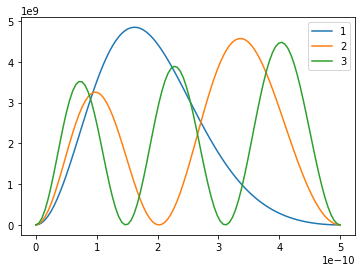

In [7]:
from numpy.linalg import eigh
from numpy import zeros
from matplotlib.pyplot import plot, show,legend

x, V = eigh(Hmat)

x = linspace(0,L,N)

def sinn(n,x,level):
    return V[n,level]*sin(pi*(n+1)*x/L)

def psi(x,level):
    s = 0
    for n in range(100):
        s += sinn(n,x,level)
    return s*s*2/L

for level in range(3):
    y = zeros(len(x))
    lab = str(level+1)
    for i in range(len(x)):
        y[i] = psi(x[i],level)

    plot(x,y,label=lab)
    legend()
show()

---
#### Exercise 6.10

Consider the equation $x = 1 - e^{-cx}$, where $c$ is a known
parameter and $x$ is unknown.  This equation arises in a variety of
situations, including the physics of contact processes, mathematical models
of epidemics, and the theory of random graphs.

1. Write a program to solve this equation for~$x$ using the relaxation
  method for the case $c=2$.  Calculate your solution to an accuracy of at
  least $10^{-6}$.
2. Modify your program to calculate the solution for values of $c$ from
  0 to 3 in steps of 0.01 and make a plot of $x$ as a function of $c$.  You
  should see a clear transition from a regime in which $x=0$ to a regime of
  nonzero $x$.  This is another example of a phase transition.  In physics
  this transition is known as the percolation transition; in
  epidemiology it is the epidemic threshold.


/Users/woodmatt/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


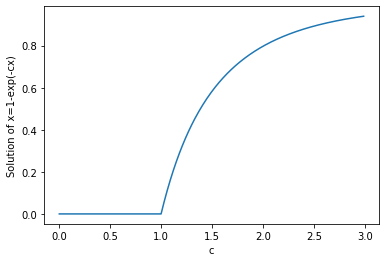

In [8]:
# Exercise 6.10

from math import exp
from numpy import arange
from pylab import plot,xlabel,ylabel,show

target = 1.e-6

def f(x,c):
    return 1-exp(-c*x)

def fp(x,c):
    return c*exp(-c*x)

cpoints = arange(0,3,0.01)
xpoints = []
for c in cpoints:
    x = 1.0
    epsilon = 1.0
    while epsilon > target:
        xp = f(x,c)
        epsilon = abs((xp-x)/(1-1/fp(xp,c)))
        x = xp
    xpoints.append(x)

plot(cpoints,xpoints)
xlabel("c")
ylabel("Solution of x=1-exp(-cx)")
show()

---
#### Exercise 6.13: Wien's displacement constant

Planck's radiation law tells us that
the intensity of radiation per unit area and per unit wavelength $\lambda$
from a black body at temperature $T$ is
$$
  I(\lambda) = {2\pi hc^2\lambda^{-5}\over e^{hc/\lambda k_BT}-1}\,,
$$
where $h$ is Planck's constant, $c$ is the speed of light, and $k_B$ is
Boltzmann's constant.


1. Show by differentiating that the wavelength $\lambda$ at which the
  emitted radiation is strongest is the solution of the equation
$$
5 e^{-hc/\lambda k_BT} + {hc\over\lambda k_BT} - 5 = 0.
$$
Make the substitution $x=hc/\lambda k_BT$ and hence show that the
wavelength of maximum radiation obeys the \defn{Wien displacement
  law}:
$$
\lambda = {b\over T}\,,
$$
where the so-called \defn{Wien displacement constant} is $b=hc/k_Bx$, and
$x$ is the solution to the nonlinear equation
$$
5 e^{-x} + x - 5 = 0.
$$
2. Write a program to solve this equation to an accuracy
  of $\epsilon=10^{-6}$ using the binary search method, and hence find a
  value for the displacement constant.
3. The displacement law is the basis for the method of
  \defn{optical pyrometry}, a method for measuring the temperatures
  of objects by observing the color of the thermal radiation they emit.
  The method is commonly used to estimate the surface temperatures of
  astronomical bodies, such as the Sun.  The wavelength peak in the
  Sun's emitted radiation falls at $\lambda=502\,\textrm{nm}$.  From the
  equations above and your value of the displacement constant, estimate the
  surface temperature of the Sun.

**Solution to part 1**  
Differentiating and setting the result to zero gives
$$
-10\pi hc^2\lambda^{-6}(e^{hc/\lambda k_B T} - 1) + 2\pi hc^2\lambda^{-5}\frac{hc}{\lambda^2k_BT}e^{hc/k_B T} = 0
$$
which can be rearranged to read
$$5 e^{-hc/\lambda k_B T} + \frac{hc}{\lambda k_B T} - 5 = 0
$$
as in the question.  When we make the given substitution we get $5e^{-x} + x - 5 = 0$ and solving this gives us the value of $x = hc/\lambda k_B T$.  Rearranging
$$\lambda = {hc}{x k_B T}.$$
Comparing with the Wien displacement law, we see that the displacement constant must be given by $b = hc/xk_B.  We find a numerical solution for $x$.

In [9]:
# Example 6.13 code

from math import exp
from scipy.constants import c,h,k

print(c,h,k)

def f(x):
    return 5*exp(-x) + x - 5

target = 1.e-6
x1 = 0.01
x2 = 10.
f1 = f(x1)
f2 = f(x2)

while x2-x1>target:
    xp = 0.5*(x1+x2)
    fxp = f(xp)
    if f1*fxp>0:
        x1,f1 = xp,fxp
    else:
        x2,f2 = xp,fxp

x = 0.5*(x1+x2)
print(f"Root is at x = {x:.5f}")
b = h*c/k/x
print(f"Wien Constant = {b}")

299792458.0 6.62607004e-34 1.38064852e-23
Root is at x = 4.96511
Wien Constant = 0.0028977730190832625


In [10]:
# Print Sun temp

lambda_max = 502 * 1.e-9

print(f"Sun Temp est = {b/lambda_max:.1f}")

Sun Temp est = 5772.5


---
#### Exercise 6.16: The Lagrange Point

 There is a magical point between the Earth and the Moon, called the
$L_1$ Lagrange point, at which a satellite will orbit the Earth in perfect
synchrony with the Moon, staying always in between the two.  This works
because the inward pull of the Earth and the outward pull of the Moon
combine to create exactly the needed centripetal force that keeps the
satellite in its orbit. 

1. Assuming circular orbits, and assuming that the Earth is much more
  massive than either the Moon or the satellite, show that the distance $r$
  from the center of the Earth to the $L_1$ point satisfies
$$
{GM\over r^2} - {Gm\over(R-r)^2} = \omega^2 r,
$$
where $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's
gravitational constant, and $\omega$ is the angular velocity of both the
Moon and the satellite.
2. The equation above is a fifth-order polynomial equation in $r$ (also
  called a quintic equation).  Such equations cannot be solved exactly in
  closed form, but it's straightforward to solve them numerically.  Write a
  program that uses either Newton's method or the secant method to solve
  for the distance $r$ from the Earth to the $L_1$ point.  Compute a
  solution accurate to at least four significant figures.

  The values of the various parameters are:
\begin{align*}
G &= 6.674\times10^{-11}\,\mathrm{m}^3\mathrm{kg}^{-1}\mathrm{s}^{-2}, \\
M &= 5.974\times10^{24}\,\mathrm{kg}, \\
m &= 7.348\times10^{22}\,\mathrm{kg}, \\
R &= 3.844\times10^8\,\mathrm{m}, \\
\omega &= 2.662\times10^{-6}\,\mathrm{s}^{-1}.
\end{align*}
You will also need to choose a suitable starting value for $r$, or two
starting values if you use the secant method.

**Solution to part 1**

Suppose the satellite has mass $\mu$. Then the gravitational force inwards on it from the Earth is $GM\mu/r^2$ and the force outwards from the moon is $Gm\mu/(R-r)^2$.  The net force is the diffference of the two, and must be equal to the required contripetal force, which is $\mu\omega^2r$.  Thus
$$\frac{GM\mu}{r^2} - \frac{Gm\mu}{(R-r)^2} = \mu\omega^2 r.
$$
Canceling a factor of $\mu$ througout gives the desired result.

In [11]:
# Exercise 6.16 Lagrange Point

# Constants
G = 6.674e-11
M = 5.974e24
m = 7.348e22
R = 3.844e8
omega = 2.662e-6
target = 1.0e-10

def f(r):
    return G*M/r**2 - G*m/(R-r)**2 - omega*omega*r

# Initial Guess
r1 = 0.0001*R
r2 = 0.9999*R
f2=f(r1)

# Main Loop
while abs(r1-r2)>target:
    f1,f2 = f2,f(r2)
    r1,r2 = r2,r2-f2*(r2-r1)/(f2-f1)
    
print(f"Distance to L1 point = {r2/1000:.1f} km")

Distance to L1 point = 326045.1 km


---
#### Exercise 6.17: Nonlinear circuits

Exercise 6.1 used regular simultaneous equations to solve for the
behavior of circuits of resistors.  Resistors are linear-current is
proportional to voltage-and the resulting equations we need to solve are
therefore also linear and can be solved by standard matrix methods.  Real
circuits, however, often include nonlinear components.  To solve for the
behavior of these circuits we need to solve nonlinear equations.

Consider the simple circuit (shown in book), a variation on the classic
Wheatstone bridge.

The resistors obey the normal Ohm law, but the diode obeys the diode
equation:
$$
I = I_0 (e^{V/V_T} - 1),
$$
where $V$ is the voltage across the diode and $I_0$ and $V_T$ are
constants.

1. The Kirchhoff current law says that the total net current flowing
  into or out of every point in a circuit must be zero.  Applying the law
  to voltage $V_1$ in the circuit above we get
$$
{V_1-V_+\over R_1} + {V_1\over R_2}
  + I_0\bigl[e^{(V_1-V_2)/V_T} - 1\bigr] = 0.
$$
Derive the corresponding equation for voltage $V_2$.
2. Solve the two nonlinear equations for the voltages $V_1$ and $V_2$
  with the conditions
\begin{align*}
V_+ &= 5\,\textrm{V}, \\
R_1 &= 1\,\mathrm{k}\Omega, \qquad
R_2 = 4\,\mathrm{k}\Omega, \qquad
R_3 = 3\,\mathrm{k}\Omega, \qquad
R_4 = 2\,\mathrm{k}\Omega, \\
I_0 &= 3\,\textrm{nA},\qquad
V_T = 0.05\,\textrm{V}.
\end{align*}
You can use either the relaxation method or Newton's method to solve the
equations.  If you use Newton's method you can solve Eq. (6.108) for
$\Delta\vec{x}$ using the function \verb|solve()| from `numpy.linalg`
if you want to, but in this case the matrix is only a $2\times2$ matrix, so
it's easy to calculate the inverse directly too.
3. The electronic engineer's rule of thumb for diodes is that the
  voltage across a (forward biased) diode is always about 0.6 volts.
  Confirm that your results agree with this rule.


**Solution to part 1**
The corresponding equation for $V_2$ is 
$$
\frac{V_2-V_+}{R_3} + \frac{V_2}{R_4} - I_0\left[{e^{(V_1-V_2)/V_T}-1}\right] = 0
$$

In [12]:
# Exercise 6.17: Nonlinear Circuits

from math import exp, sqrt

R1 = 1000.
R2 = 4000.
R3 = 3000.
R4 = 2000.
Vp = 5.
VT = 0.05
I0 = 3.0e-9

target = 1.e-8

# Initial Guesses
V1 = 1.0
V2 = 1.0

# Main Loop
error = 1.0
while error>target:
    
    # Calc matrix elements and determinant
    x = exp((V1-V2)/VT)*I0/VT
    a = 1/R1 + 1/R2 + x
    b = -x
    c = -x
    d = 1/R3 + 1/R4 + x
    det = a*d - b*c
    
    # Calc inverse
    ia = d/det
    id = a/det
    ib = -b/det
    ic = -c/det
    
    # Calc vector elements
    y = I0*(exp((V1-V2)/VT)-1)
    z1 = (V1-Vp)/R1 + V1/R2 + y
    z2 = (V2-Vp)/R3 + V2/R4 - y
    
    # Calc value of Delta x
    deltaV1 = ia*z1 + ib*z2
    deltaV2 = ic*z1 + id*z2
    
    # calc the error
    error = sqrt(deltaV1**2 + deltaV2**2)
    
    #calc new voltages
    V1 -= deltaV1
    V2 -= deltaV2
    
print(f"V1 = {V1:.3f}V  V2 = {V2:.3f}V")

V1 = 3.447V  V2 = 2.830V


---
#### Exercise 6.18: The Temperature of a Light Bulb

An incandescent light bulb is a simple device-it contains a
filament, usually made of tungsten, heated by the flow of electricity until
it becomes hot enough to radiate thermally.  Essentially all of the power
consumed by such a bulb is radiated as electromagnetic energy, but some of
the radiation is not in the visible wavelengths, which means it is useless
for lighting purposes.

Let us define the efficiency of a light bulb to be the fraction of the
radiated energy that falls in the visible band.  It's a good approximation
to assume that the radiation from a filament at temperature $T$ obeys the
Planck radiation law, meaning that the power radiated per unit
wavelength $\lambda$ obeys
$$
  I(\lambda) = 2\pi A hc^2 {\lambda^{-5}\over e^{hc/\lambda k_BT}-1},
$$
where $A$ is the surface area of the filament, $h$ is Planck's constant,
$c$ is the speed of light, and $k_B$ is Boltzmann's constant.  The visible
wavelengths run from $\lambda_1=390\,$nm to $\lambda_2=750\,$nm, so the
total energy radiated in the visible window is
$\int_{\lambda_1}^{\lambda_2} I(\lambda)\>d\lambda$ and the total energy
at all wavelengths is $\int_0^\infty I(\lambda)\>d\lambda$.  Dividing one
expression by the other and substituting for $I(\lambda)$ from above, we
get an expression for the efficiency $\eta$ of the light bulb thus:
$$
\eta = {\int_{\lambda_1}^{\lambda_2} \lambda^{-5}/(e^{hc/\lambda
        k_BT}-1) \>d\lambda\over
        \int_0^\infty \lambda^{-5}/(e^{hc/\lambda k_BT}-1) \>d\lambda},
$$
where the leading constants and the area~$A$ have canceled out.  Making
the substitution $x=hc/\lambda k_BT$, this can also be written as
$$
\eta = {\int_{hc/\lambda_2 k_BT}^{hc/\lambda_1 k_BT} x^3/(e^x-1) \>d x
        \over \int_0^\infty x^3/( e^x-1) \>d x}
     = {15\over\pi^4}
       \int_{hc/\lambda_2 k_BT}^{hc/\lambda_1 k_BT}
       {x^3\over e^x-1} \>d x,
$$
where we have made use of the known exact value of the integral in the
denominator.


1. Write a Python function that takes a temperature $T$ as its argument
  and calculates the value of $\eta$ for that temperature from the formula
  above.  The integral in the formula cannot be done analytically, but you
  can do it numerically using any method of your choice.  (For instance,
  Gaussian quadrature with 100 sample points works fine.)  Use your
  function to make a graph of $\eta$ as a function of temperature between
  $300\,$K and $10\,000\,$K.  You should see that there is an intermediate
  temperature where the efficiency is a maximum.
2. Calculate the temperature of maximum efficiency of the light bulb to
  within $1\,$K using golden ratio search.  (Hint: An accuracy of $1\,$K is
  the equivalent of a few parts in ten thousand in this case.  To get this
  kind of accuracy in your calculation you'll need to use values for the
  fundamental constants that are suitably accurate, i.e., you will need
  values accurate to several significant figures.)
3. Is it practical to run a tungsten-filament light bulb at the
  temperature you found?  If not, why not?

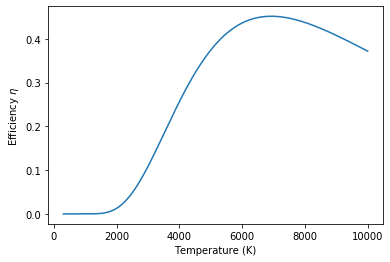

300.0 10000.0 0.2572059279163538
4005.0703091260193 10000.0 0.4448821863293343
4005.0703091260193 7710.14061825204 0.4071323139584191
5420.281236504079 7710.14061825204 0.4448821863293343
6294.929690873981 7710.14061825204 0.45156053211782227
6294.929690873981 7169.5781452438805 0.4502599484508482
6629.015672235721 7169.5781452438805 0.45156053211782227
6835.49216388214 7169.5781452438805 0.45167593455632876
6835.49216388214 7041.96865552856 0.4516907745740001
6835.49216388214 6963.101653597461 0.4516638597893145
6884.234651666362 6963.101653597461 0.4516907745740001
6914.359165813238 6963.101653597461 0.45169354807010215
6914.359165813238 6944.483679960114 0.4516937288983834
6914.359165813238 6932.977139450585 0.4516930751773707
6921.470598941055 6932.977139450585 0.4516937288983834
6925.865706322767 6932.977139450585 0.4516938402943886
6925.865706322767 6930.260813704481 0.4516938241011817
6927.5444879583765 6930.260813704481 0.4516938402943886
6927.5444879583765 6929.223269593986 0.

In [13]:
# Exercise 6.18: The Temperature of a Light Bulb

from numpy import exp,sqrt,linspace,zeros
from gaussxw import gaussxw
from scipy.constants import k,c,h,pi
from pylab import plot,show,xlabel,ylabel
from scipy.optimize import minimize

def f(x):
    return x**3 / (exp(x)-1)

lambda1 = 390.0e-9
lambda2 = 750.0e-9
N = 1000

Tlo = 300.
Thi = 10000.
target =1.0
z = (-1+sqrt(5))/2

x,w = gaussxw(N)

# Function to calculate efficiency
def eta(T):
    a = h*c/(lambda2*k*T)
    b = h*c/(lambda1*k*T)
    xp = 0.5*(b-a)*x +  0.5*(b+a)
    wp = 0.5*(b-a)*w
    s = 0.0
    for i in range(N):
        s += wp[i]*f(xp[i])
    return 15*s/pi**4


# Plot the efficiency
T_arr = linspace(Tlo,Thi,300)
eta_arr = zeros(len(T_arr))
for i in range(len(T_arr)):
    eta_arr[i] = eta(T_arr[i])
plot(T_arr,eta_arr)
xlabel("Temperature (K)")
ylabel("Efficiency $\eta$")
show()

# Starting values of the temperature points
T1 = Tlo
T2 = Thi - z*(Thi-Tlo)
T3 = Tlo + z*(Thi-Tlo)
T4 = Thi
eta1 = eta(T1)
eta2 = eta(T2)
eta3 = eta(T3)
eta4 = eta(T4)

# Main Loop
while T4-T1>target:
    print(T1,T4,eta2)
    
    # Work out which three points are new bracket
    if eta2>eta3:
        T4,eta4 = T3,eta3
        T3,eta3 = T2,eta2
        T2 = T4 - z*(T4-T1)
        eta2 = eta(T2)
    else:
        T1,eta1 = T2,eta2
        T2,eta2 = T3,eta3
        T3 = T1 + z*(T4-T1)
        eta3 = eta(T3)

print(T1,T4,eta2)

# Now do it with scipy.optimize
def etam1(T):         # -1 * eta (since we're minimizing)
    return -1*eta(T)

res = minimize(etam1,5000)
print(f"Maximum using SciPy.optimize = {res.x}")

We find T of about 6928K, which is above the melting point of tungsten.  So it is too high.  We run at about 3700K, which has an efficientcy of only around 20%.